In [16]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as ms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
abalone_data  = pd.read_csv(r'https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv' )

abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


# Exploratory Data Analysis

*   Check the datatype of all the variables in the data
*   Check whether there are any missing data or null data in the dataset .
If found replace with appropiate value such as mean /median .Else if there has been any data insertion error and the variance is not large enough to impact the dataset ,then keep it.

In [3]:
abalone_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [18]:
pd.DataFrame( abalone_data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0
is_Female,0


In [4]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


In [5]:
abalone_data.Sex.value_counts()

M    1138
I    1013
F     981
Name: Sex, dtype: int64

In [6]:
corr=abalone_data.corr()
corr.style.background_gradient(cmap='RdBu')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986523,0.890674,0.924719,0.898828,0.901679,0.900571,0.550276
Diameter,0.986523,1.000000,0.897447,0.925138,0.894484,0.898299,0.908248,0.567615
Height,0.890674,0.897447,1.000000,0.881028,0.834576,0.859091,0.882061,0.589325
Whole weight,0.924719,0.925138,0.881028,1.000000,0.971052,0.965639,0.957100,0.534093
Shucked weight,0.898828,0.894484,0.834576,0.971052,1.000000,0.933097,0.887878,0.415403
Viscera weight,0.901679,0.898299,0.859091,0.965639,0.933097,1.000000,0.908051,0.496904
Shell weight,0.900571,0.908248,0.882061,0.957100,0.887878,0.908051,1.000000,0.622351
Rings,0.550276,0.567615,0.589325,0.534093,0.415403,0.496904,0.622351,1.000000


In [9]:
gender_cat_to_num_data = pd.get_dummies(abalone_data.Sex,prefix='Gender')
gender_cat_to_num_data

,Gender_F,Gender_I,Gender_M
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
3127,0,0,1
3128,0,1,0
3129,0,0,1
3130,0,0,1


In [11]:

abalone_data['is_Female'] = gender_cat_to_num_data['Gender_F']
abalone_data['is_Male'] = gender_cat_to_num_data['Gender_M']
abalone_data['is_Infant'] = gender_cat_to_num_data['Gender_I']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


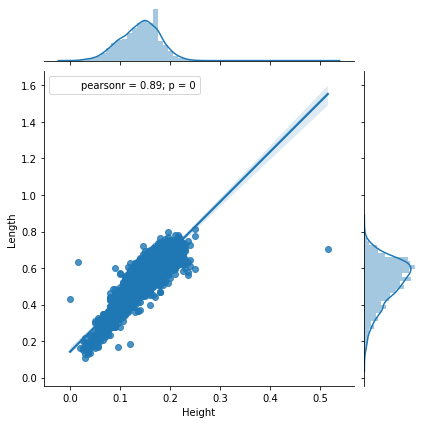

In [69]:
from scipy import stats
j = sns.jointplot("Height", "Length", data = abalone_data, kind = 'reg')
j.annotate(stats.pearsonr)
plt.show()

# Checking the variation Inflation Factor 



In [ ]:
X1 = sm.tools.add_constant(abalone_data)



# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)


# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

In [22]:
# get the summary
desc_df = abalone_data.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,is_Female,is_Male,is_Infant
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.828670,0.359229,0.180731,0.239159,9.947957,0.313218,0.363346,0.323436
std,0.119891,0.099336,0.038991,0.490630,0.221946,0.109924,0.139040,3.230252,0.463876,0.481040,0.467862
min,0.110000,0.090000,0.000000,0.008000,0.002500,0.000500,0.003000,2.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.185375,0.093375,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.335500,0.170000,0.235000,10.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.499500,0.252500,0.330000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000
+3_std,0.883381,0.705961,0.256250,2.300561,1.025066,0.510502,0.656280,19.638714,1.704848,1.806466,1.727022
-3_std,0.164033,0.109943,0.022303,-0.643221,-0.306609,-0.149040,-0.177962,0.257199,-1.078411,-1.079774,-1.080151


In [41]:

#train_data = train_data.drop('Sex',axis=1)



train_features,validation_features,train_target,validation_target = train_test_split(features,target,test_size=0.20,random_state=1)




,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,is_Female,is_Male,is_Infant
0,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.2080,1,0,0
1,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.1400,1,0,0
2,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,0,1,0
3,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.6000,1,0,0
4,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.3450,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3127,0.415,0.315,0.120,0.4015,0.1990,0.0870,0.0970,0,1,0
3128,0.325,0.240,0.070,0.1520,0.0565,0.0305,0.0540,0,0,1
3129,0.565,0.455,0.155,0.9355,0.4210,0.1830,0.2600,0,1,0
3130,0.610,0.485,0.145,1.3305,0.7830,0.2255,0.2865,0,1,0


In [42]:
model_LR = LinearRegression(normalize = False)
model_LR.fit(train_features, train_target)

LinearRegression()

In [43]:

print("Model intercept  : ", model_LR.intercept_, "\n")
print("Model coefficient: ", model_LR.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_LR.coef_[i])

Model intercept  :  3.6186009190637627 

Model coefficient:  [ -0.13347362   7.95570266  19.74265921  11.66761401 -22.6006023
 -13.01663325   5.10020825   0.20955043   0.32953324  -0.53908367] 

Length :  -0.13347361871711674
Diameter :  7.955702655802082
Height :  19.74265920570537
Whole weight :  11.667614014086036
Shucked weight :  -22.600602299421315
Viscera weight :  -13.01663324642201
Shell weight :  5.100208253956415
is_Female :  0.20955042710652322
is_Male :  0.32953324298799896
is_Infant :  -0.5390836700944702


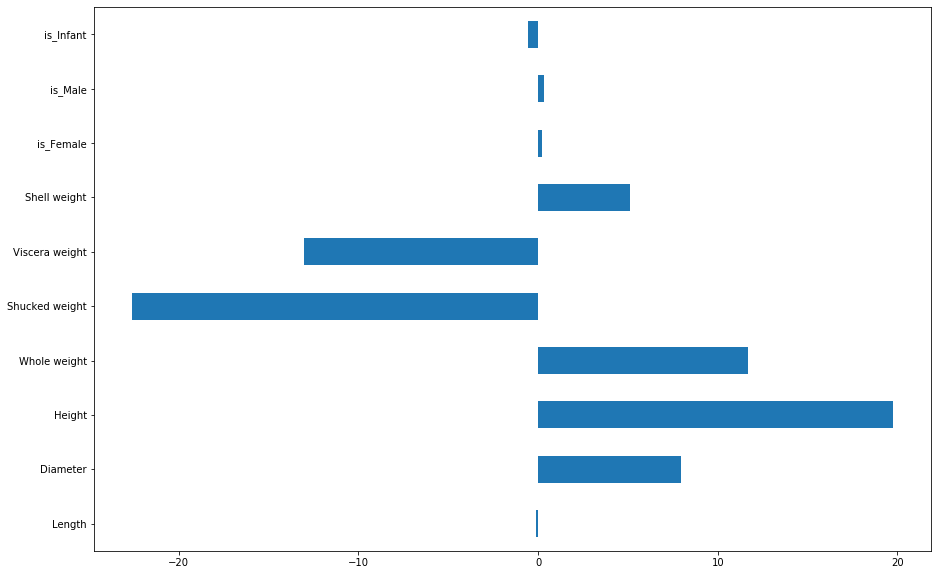

In [71]:
plt.figure(figsize=(15,10))
important_coeff = pd.Series(model_LR.coef_,index=train_features.columns)
important_coeff.plot(kind='barh')
plt.show()

In [62]:

# Model evaluation for training set
train_target_pred = model_LR.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
model_mae = mean_absolute_error(train_target, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Linear Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")
print('MAE is {}'.format(model_mae))


      Rings  Predicted  Difference
1363     13  13.290531    0.290531
937      12   9.006230   -2.993770
1777     11  11.950652    0.950652
3015      7   7.659879    0.659879
2138     10  10.651483    0.651483
2132     11   9.662715   -1.337285
1421      6   5.753833   -0.246167
1690      9   9.558854    0.558854
2952      5   5.747630    0.747630
1228      9  11.805850    2.805850 

Linear Regression Model training performance:
---------------------------
RMSE is 2.1694588707259412
--------------------------
MAE is 1.5629206465001526


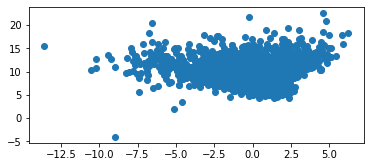

In [51]:

output_full = pd.DataFrame(train_target)
output_full['Predicted'] = train_target_pred
output_full['Difference'] = output_full['Predicted'] - output_full['Rings']
    
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(output_full['Difference'],  output_full['Predicted'])




It seems like the corresponding residual plot is reasonably random. To confirm that, let’s go with a hypothesis test, 
Harvey-Collier multiplier test, for linearity

0.9269332746548816

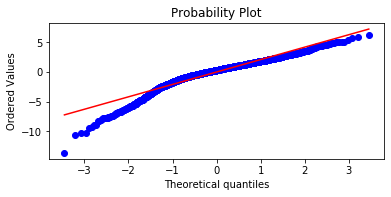

In [52]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(output_full['Difference'], plot=ax, fit=True)
r**2

The good fit indicates that normality is a reasonable approximation.

In [54]:
from sklearn.model_selection import cross_val_score

In [56]:

MSE_CV_scores = -1*(cross_val_score(model_LR,train_features,train_target,cv=5,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Linear Regression Model Cross Validation Training Set performance:")
print("---------------------------")

print ('MSE_CV_scores {}'.format(MSE_CV_scores))
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Linear Regression Model Cross Validation Training Set performance:
---------------------------
MSE_CV_scores [4.63488404 4.88391585 4.99230149 4.13222289 5.34918584]
RMSE is 2.1905483380895454
--------------------------


In [57]:
# Model evaluation for testing set
validation_target_pred = model_LR.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Linear Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  11.461085    1.461085
110      15  11.908122   -3.091878
2845      9   7.905424   -1.094576
517       7   6.791044   -0.208956
340       9   9.524055    0.524055
1047      4   7.657453    3.657453
1856      8   8.573165    0.573165
1668     11  10.705999   -0.294001
2455      5   5.202307    0.202307
2338      9  10.386124    1.386124 

Linear Regression Model test performance:
---------------------------
RMSE is 2.253158819453463
--------------------------


Ridge Regression

Tried to reduce the magnitude of model intercept and coefficients using this ML Model¶

In [ ]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [75]:
from sklearn.linear_model import Ridge,RidgeCV
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = False)
ridgecv.fit(train_features, train_target)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [76]:

ridgecv.alpha_

0.06164233697210317

In [77]:

model_RR = Ridge(alpha=0.06164233697210317,normalize = False)
model_RR.fit(train_features, train_target)

Ridge(alpha=0.06164233697210317)

In [79]:

print("Model intercept  : ", model_RR.intercept_, "\n")
print("Model coefficient: ", model_RR.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_RR.coef_[i])

Model intercept  :  3.6902164908729365 

Model coefficient:  [  0.36629293   7.57483816  17.94977816  11.20930225 -22.15012189
 -12.27966224   5.75381477   0.21506447   0.33149812  -0.5465626 ] 

Length :  0.3662929290289876
Diameter :  7.574838155146852
Height :  17.94977815986285
Whole weight :  11.209302249372605
Shucked weight :  -22.150121886966886
Viscera weight :  -12.279662238230927
Shell weight :  5.753814765938526
is_Female :  0.21506447384322985
is_Male :  0.33149812317183863
is_Infant :  -0.546562597059097


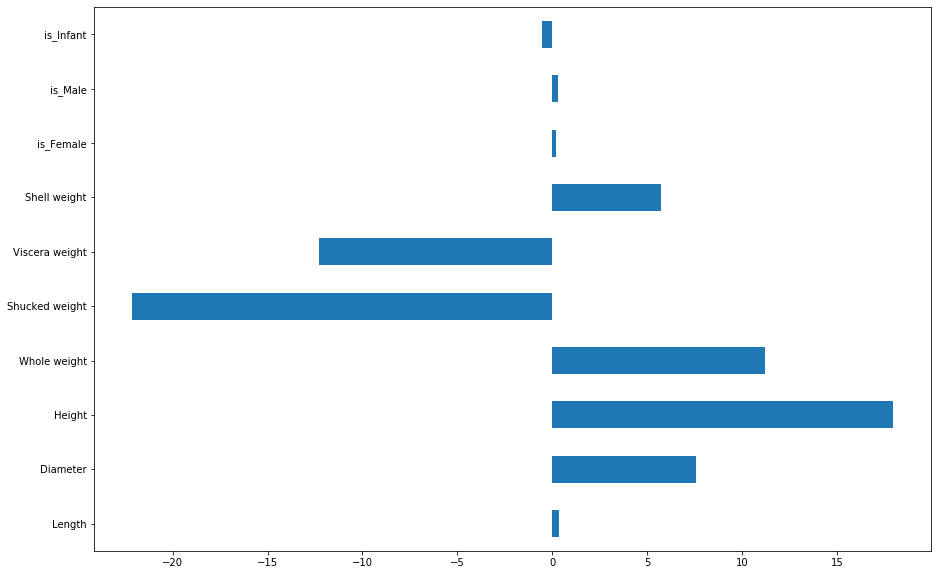

In [80]:
plt.figure(figsize=(15,10))
important_coeff_ridge = pd.Series(model_RR.coef_,index=train_features.columns)
important_coeff_ridge.plot(kind='barh')
plt.show()

In [81]:

# Model evaluation for training set
train_target_pred = model_RR.predict(train_features)
rmse = np.sqrt(mean_squared_error(train_target, train_target_pred))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Ridge Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  13.236550    0.236550
937      12   9.071415   -2.928585
1777     11  11.951932    0.951932
3015      7   7.650184    0.650184
2138     10  10.649058    0.649058
2132     11   9.640526   -1.359474
1421      6   5.774369   -0.225631
1690      9   9.539803    0.539803
2952      5   5.767794    0.767794
1228      9  11.822052    2.822052 

Ridge Regression Model training performance:
---------------------------
RMSE is 2.1697723764017005
--------------------------


In [83]:

MSE_CV_scores = -1*(cross_val_score(model_RR,train_features,train_target,cv=5,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Ridge Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Ridge Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.1903896422669833
--------------------------


In [84]:
# Model evaluation for testing set
validation_target_pred = model_RR.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Ridge Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  11.451508    1.451508
110      15  11.840488   -3.159512
2845      9   7.880139   -1.119861
517       7   6.814121   -0.185879
340       9   9.488956    0.488956
1047      4   7.658626    3.658626
1856      8   8.607124    0.607124
1668     11  10.681699   -0.318301
2455      5   5.252429    0.252429
2338      9  10.416059    1.416059 

Ridge Regression Model test performance:
---------------------------
RMSE is 2.2482657214285533
--------------------------


#  Lasso Regression
To reduce the number of features in the Model¶

In [85]:

from sklearn.linear_model import Lasso,LassoCV

In [86]:
lassocv = LassoCV(alphas = alphas, normalize = False)
lassocv.fit(train_features, train_target)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]))

In [87]:
lassocv.alpha_

0.005

In [88]:
model_lasso = Lasso(alpha=0.005, normalize= False)
model_lasso.fit(train_features,train_target)

Lasso(alpha=0.005)

In [89]:
model_lasso.n_iter_

553

In [90]:

coeff_used = np.sum(model_lasso.coef_!=0)
coeff_used

8

In [91]:
print("Model intercept  : ", model_lasso.intercept_, "\n")
print("Model coefficient: ", model_lasso.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_lasso.coef_[i])
    

Model intercept  :  5.288753522779095 

Model coefficient:  [  0.           7.45322438   3.49498128   7.24880158 -18.20695732
  -2.63358555  10.12932588  -0.           0.06289191  -0.87335587] 

Length :  0.0
Diameter :  7.453224384062317
Height :  3.4949812766705013
Whole weight :  7.248801584970726
Shucked weight :  -18.206957315794515
Viscera weight :  -2.6335855487587763
Shell weight :  10.129325878531823
is_Female :  -0.0
is_Male :  0.06289190723300077
is_Infant :  -0.8733558658683491


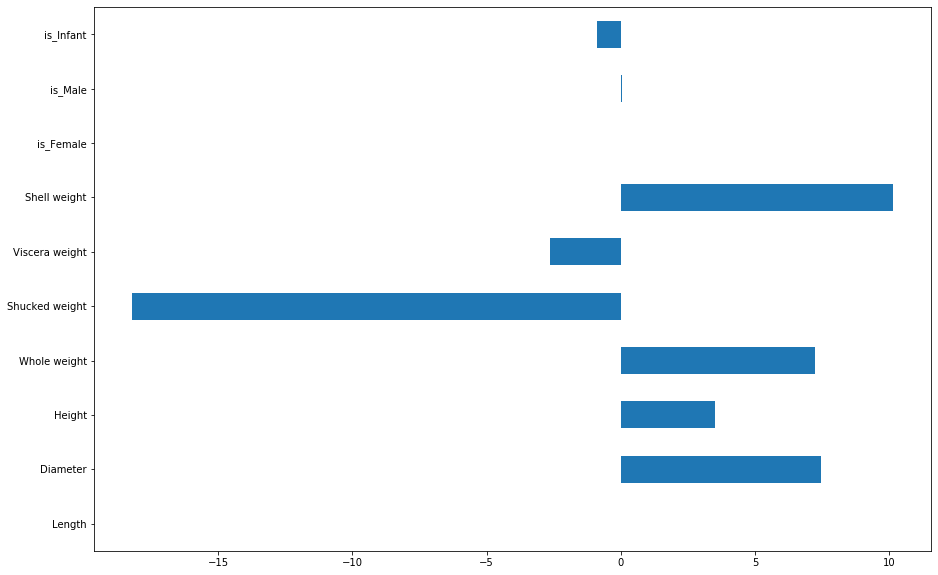

In [92]:
plt.figure(figsize=(15,10))
important_coeff_lasso = pd.Series(model_lasso.coef_,index=train_features.columns)
important_coeff_lasso.plot(kind='barh')
plt.show()

In [93]:

# Model evaluation for training set
train_target_pred = model_lasso.predict(train_features)
rmse = np.sqrt(mean_squared_error(train_target, train_target_pred))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Lasso Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  12.690931   -0.309069
937      12   9.660371   -2.339629
1777     11  12.027068    1.027068
3015      7   7.632969    0.632969
2138     10  10.607863    0.607863
2132     11   9.626559   -1.373441
1421      6   6.162314    0.162314
1690      9   9.438478    0.438478
2952      5   6.154953    1.154953
1228      9  12.019008    3.019008 

Lasso Regression Model training performance:
---------------------------
RMSE is 2.2045827014380532
--------------------------


In [94]:

MSE_CV_scores = -1*(cross_val_score(model_lasso,train_features,train_target,cv=10,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Lasso Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Lasso Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.2212441959894513
--------------------------


In [95]:

# Model evaluation for testing set
validation_target_pred = model_lasso.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Lasoo Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  11.522347    1.522347
110      15  11.433518   -3.566482
2845      9   7.738236   -1.261764
517       7   7.015239    0.015239
340       9   9.126289    0.126289
1047      4   7.719870    3.719870
1856      8   8.807803    0.807803
1668     11  10.295287   -0.704713
2455      5   5.923701    0.923701
2338      9  10.519488    1.519488 

Lasoo Regression Model test performance:
---------------------------
RMSE is 2.248814721087799
--------------------------


In [96]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 20, max_features='auto',max_depth=5,
                                  criterion='mse',verbose=2,n_jobs=-1)

In [97]:
model_rfr.fit(train_features, train_target)

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20building tree 10 of 20
building tree 11 of 20

building tree 12 of 20
building tree 13 of 20
building tree 14 of 20building tree 15 of 20
building tree 16 of 20

building tree 17 of 20
building tree 18 of 20building tree 19 of 20
building tree 20 of 20



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestRegressor(max_depth=5, n_estimators=20, n_jobs=-1, verbose=2)

In [98]:
# Model evaluation for training set
train_target_pred = model_rfr.predict(train_features)
rmse = np.sqrt(mean_squared_error(train_target, train_target_pred))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("Random Forest Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  14.262831    1.262831
937      12  12.150142    0.150142
1777     11  10.779966   -0.220034
3015      7   7.129588    0.129588
2138     10   9.906899   -0.093101
2132     11  10.040417   -0.959583
1421      6   5.212006   -0.787994
1690      9   9.420375    0.420375
2952      5   5.063671    0.063671
1228      9  11.594684    2.594684 

Random Forest Regression Model training performance:
---------------------------
RMSE is 2.044701296331415
--------------------------


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


In [99]:
MSE_CV_scores = -1*(cross_val_score(model_rfr,train_features,train_target,cv=5,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("Random Forest Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

Random Forest Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.249903766123499
--------------------------


In [100]:
# Model evaluation for testing set
validation_target_pred = model_rfr.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("RandomForest Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  10.615776    0.615776
110      15  10.542457   -4.457543
2845      9   7.129588   -1.870412
517       7   7.023870    0.023870
340       9   9.565619    0.565619
1047      4   7.798479    3.798479
1856      8   9.158822    1.158822
1668     11  10.692842   -0.307158
2455      5   4.722950   -0.277050
2338      9  11.500834    2.500834 

RandomForest Regression Model test performance:
---------------------------
RMSE is 2.253284549361551
--------------------------


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


In [101]:

from sklearn.model_selection import GridSearchCV

In [102]:
# Different parameters in random forest

max_depth = [5,6,7,8]        # what depth to consider

n_estimators = [50,60,70,75,80,90,100]       # Number of trees in random forest

min_samples_leaf = [5,10,15,20,25,30,40,50]       # Number of features to consider at every split

max_features = ['auto', 'sqrt', 'log2']

params = {'max_depth': max_depth,
          'n_estimators': n_estimators,
          'min_samples_leaf': min_samples_leaf,
           'max_features' : max_features
          }

In [103]:
model_gs = GridSearchCV(estimator=model_rfr, param_grid=params, n_jobs=-1)

In [104]:
model_gs.fit(train_features, train_target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90building tree 10 of 90

building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90building tree 19 of 90

building tree 20 of 90
building tree 21 of 90building tree 22 of 90
building tree 23 of 90
building tree 24 of 90

building tree 25 of 90
building tree 26 of 90building tree 27 of 90
building tree 28 of 90building tree 29 of 90

building tree 30 of 90

building tree 31 of 90building tree 32 of 90

building tree 33 of 90building tree 34 of 90building tree 35 of 90

building tree 36 of 90

building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90building tree 42 of 90
building tree 43 of 90

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


GridSearchCV(estimator=RandomForestRegressor(max_depth=5, n_estimators=20,
                                             n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 40, 50],
                         'n_estimators': [50, 60, 70, 75, 80, 90, 100]})

In [105]:
model_gs.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 90}

In [106]:
finalmodel_rfr = RandomForestRegressor(n_estimators = 90, max_features='auto',max_depth=8, min_samples_leaf= 10,
                                  criterion='mse',verbose=2,n_jobs=-1)

In [107]:
finalmodel_rfr.fit(train_features, train_target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90building tree 11 of 90

building tree 12 of 90building tree 13 of 90building tree 14 of 90


building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90building tree 23 of 90
building tree 24 of 90

building tree 25 of 90building tree 26 of 90
building tree 27 of 90

building tree 28 of 90
building tree 29 of 90building tree 30 of 90
building tree 31 of 90
building tree 32 of 90

building tree 33 of 90
building tree 34 of 90building tree 35 of 90

building tree 36 of 90
building tree 37 of 90building tree 38 of 90

building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90building tree 44 of 9

RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=90,
                      n_jobs=-1, verbose=2)

In [108]:

# Model evaluation for testing set
train_target_pred = finalmodel_rfr.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("RandomForest HyperParameter Tuned Regression Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
1363     13  14.382902    1.382902
937      12  11.151020   -0.848980
1777     11  11.148952    0.148952
3015      7   7.320480    0.320480
2138     10   9.708442   -0.291558
2132     11   9.767514   -1.232486
1421      6   5.221917   -0.778083
1690      9   9.349896    0.349896
2952      5   5.115613    0.115613
1228      9  10.744449    1.744449 

RandomForest HyperParameter Tuned Regression Model training performance:
---------------------------
RMSE is 1.8384311112386873
--------------------------


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    0.0s finished


In [109]:
MSE_CV_scores = -1*(cross_val_score(finalmodel_rfr,train_features,train_target,cv=10,scoring='neg_mean_squared_error',n_jobs = -1))

RMSE_CV = ( MSE_CV_scores.mean() ) ** (1/2)

print("RandomForest HyperParameter Tuned Regression Model Cross Validation Training Set performance:")
print("---------------------------")
print('RMSE is {}'.format(RMSE_CV))
print("--------------------------")

RandomForest HyperParameter Tuned Regression Model Cross Validation Training Set performance:
---------------------------
RMSE is 2.1706633373417907
--------------------------


In [110]:
# Model evaluation for testing set
validation_target_pred = finalmodel_rfr.predict(validation_features)
rmse = (np.sqrt(mean_squared_error(validation_target, validation_target_pred)))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(validation_target[0:10])
output['Predicted'] = validation_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Rings']
print(output, "\n")

print("RandomForest HyperParameter Tuned Regression Model test performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------")

      Rings  Predicted  Difference
3116     10  10.360794    0.360794
110      15  10.873980   -4.126020
2845      9   7.804713   -1.195287
517       7   6.818097   -0.181903
340       9  10.208104    1.208104
1047      4   7.508510    3.508510
1856      8   8.734323    0.734323
1668     11  10.310153   -0.689847
2455      5   4.793558   -0.206442
2338      9  10.997969    1.997969 

RandomForest HyperParameter Tuned Regression Model test performance:
---------------------------
RMSE is 2.1623927397543543
--------------------------


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    0.0s finished


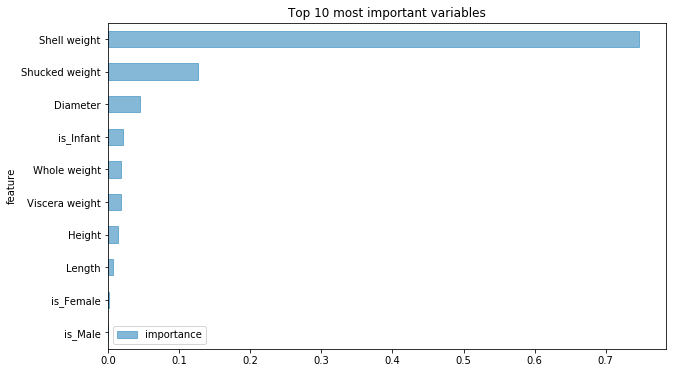

In [111]:
feature_importances_data = []
features = train_features.columns
for feature_name, feature_importance in zip(features, model_rfr.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)